Importação dos Dados e Bibliotecas

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import joblib
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('Aligators x Crocodiles.csv')
df.loc[80:150]

,Nome,Tamanho,Fucinho,Peso,Coloração,Alimentação,Região
80,Crocodylus acutus,"3,8",Longo,418.00,Cinza,Crustaceos,America Central
81,Crocodylus acutus,"3,9",Medio,420.00,Preto,Moluscos,America Central
82,Caiman yacare,"3,0",Medio,300.00,Amarelo Escuro,Peixes,America do Sul
83,Caiman yacare,"2,6",Medio,320.67,Preto,Moluscos,America do Sul
84,Caiman yacare,"3,3",Medio,290.00,Preto Amarelo,Moluscos,America do Sul
...,...,...,...,...,...,...,...
146,Alligator mississippiensis,"2,7",Medio,390.00,Verde Escuro,Peixes,Estados Unidos
147,Alligator mississippiensis,"3,0",Curto,395.20,Preto,Peixes,Estados Unidos
148,Alligator mississippiensis,"2,3",Curto,420.00,Cinza,Inseto,Estados Unidos
149,Alligator mississippiensis,"2,2",Medio,400.00,Verde Escuro,Inseto,Estados Unidos


Analise dos Dados

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nome         164 non-null    object 
 1   Tamanho      164 non-null    object 
 2   Fucinho      164 non-null    object 
 3   Peso         164 non-null    float64
 4   Coloração    164 non-null    object 
 5   Alimentação  164 non-null    object 
 6   Região       164 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.1+ KB


Transformações das Colunas Object Para Categóricas, e Coluna Tamanho em Float

In [55]:
def formata_numeros(num, alphas=(), decimals=None):
    """
    Transforma em inteiro ou real dependendo do formato que o número apresentar.

    1. Parâmetros:
        - num: (str) string numérica a ser transformada
        - alphas: (iter) conjunto de caracteres que devem ser 
        removidos antes do número ser transformado em float.
        - decimal_houses: (int) representa a quantidade de casas decimais que o
        número terá ao ser retornado.
    
    2. Exemplos:
    In [1]: formata_numeros('123,456,789.1011')
    Out[1]: 123456789.1011

    In [2]: formata_numeros('R$ 123.456.789,1011')
    Out[2]: 123456789.1011

    In [3]: formata_numeros('98,99%')
    Out[3]: 0.9899
    >>> 
    """
    import re
    if num:
        num = str(num).strip()
        original = num
        percentage_pattern = re.compile("([0-9])+[,|.]([0-9])+%")
        percentage = bool(percentage_pattern.match(num))
        alphas = set((*alphas, *'%$R°º()'))
        num = ''.join([c for c in num if c not in alphas])
        num = re.split('\,|\.', num)
        try:
            if len(num) > 1: # É FLOAT
                num = float(''.join(num[:-1])+'.'+num[-1])
                if decimals and not percentage:
                    return format(num, f'.{decimals}f')
                elif decimals and percentage:
                    return format(num/100, f'.{decimals}f')
                elif not decimals and not percentage:
                    return num
                elif not decimals and percentage:
                    return num/100
            else: # É INTEIRO
                if percentage:
                    return int(''.join(num))/100
                else:
                    return int(''.join(num))
        except ValueError:
            num = ''.join(num[:-1]) + '.' + num[-1]
            raise ValueError(
                f"Não foi possível converter o número '{original}' para float")

In [56]:
#Transformando variaveis em categorias.
le = LabelEncoder()

for variaveis in ['Nome','Fucinho','Coloração','Alimentação','Região']:
    new_df[variaveis] = le.fit_transform(new_df[variaveis])
new_df.loc[80:150]

,Nome,Tamanho,Fucinho,Peso,Coloração,Alimentação,Região
80,2,3.8,1,418.00,2,2,0
81,2,3.9,2,420.00,3,4,0
82,1,3.0,2,300.00,0,5,1
83,1,2.6,2,320.67,3,4,1
84,1,3.3,2,290.00,4,4,1
...,...,...,...,...,...,...,...
146,0,2.7,2,390.00,5,5,2
147,0,3.0,0,395.20,3,5,2
148,0,2.3,0,420.00,2,3,2
149,0,2.2,2,400.00,5,3,2


In [7]:
new_df.to_csv('new_df')

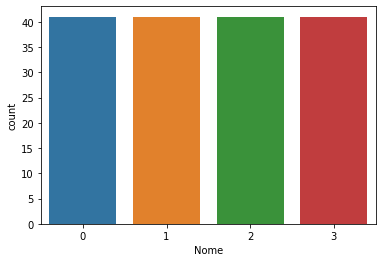

In [7]:
ax = sns.countplot(x = new_df['Nome'],data = new_df)

In [51]:
df['Tamanho'] = df['Tamanho'].apply(formata_numeros)
new_df = df
new_df.loc[80:150]

,Nome,Tamanho,Fucinho,Peso,Coloração,Alimentação,Região
80,Crocodylus acutus,3.8,Longo,418.00,Cinza,Crustaceos,America Central
81,Crocodylus acutus,3.9,Medio,420.00,Preto,Moluscos,America Central
82,Caiman yacare,3.0,Medio,300.00,Amarelo Escuro,Peixes,America do Sul
83,Caiman yacare,2.6,Medio,320.67,Preto,Moluscos,America do Sul
84,Caiman yacare,3.3,Medio,290.00,Preto Amarelo,Moluscos,America do Sul
...,...,...,...,...,...,...,...
146,Alligator mississippiensis,2.7,Medio,390.00,Verde Escuro,Peixes,Estados Unidos
147,Alligator mississippiensis,3.0,Curto,395.20,Preto,Peixes,Estados Unidos
148,Alligator mississippiensis,2.3,Curto,420.00,Cinza,Inseto,Estados Unidos
149,Alligator mississippiensis,2.2,Medio,400.00,Verde Escuro,Inseto,Estados Unidos


Separação dos Dados de Treino,Teste e Criação do Modelo De Previsão

In [15]:
#Separação das variaveis explicativas X , e o target y.

X = new_df[['Tamanho','Fucinho','Peso','Coloração','Alimentação','Região']]
y = new_df[['Nome']].values
print(X.shape,y.shape)

(164, 6) (164, 1)


In [16]:
#Separação do treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
print(X_test.shape,y_test.shape)

(50, 6) (50, 1)


In [17]:
#Criação do modelo Arvore de Decisão
model_Lr = LogisticRegression(multi_class = 'ovr')

In [18]:
model_Lr.fit(X_train,y_train)
model_Lr

LogisticRegression(multi_class='ovr')

In [19]:
cv = cross_val_score(model_Lr,X,y,cv = 5 , scoring = 'accuracy')
cv

array([1.        , 0.90909091, 1.        , 0.93939394, 1.        ])

In [20]:
predict_Lr = model_Lr.predict(X_test)

In [21]:
medicao = classification_report(predict_Lr,y_test)
print(medicao)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.72      1.00      0.84        13
           2       1.00      0.69      0.82        13
           3       1.00      1.00      1.00        14

    accuracy                           0.90        50
   macro avg       0.93      0.90      0.90        50
weighted avg       0.93      0.90      0.90        50



In [15]:
erro = mean_absolute_error(predict_Lr,y_test)
print(erro)

0.06


In [20]:
model_dtc = tree.DecisionTreeClassifier()

In [21]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model_dtc = model_dtc.predict(X_test)

In [23]:
medicao_dtc = classification_report(model_dtc,y_test)
print(medicao_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [68]:
dados = np.array([6.0,2,1000,4,0,2]).reshape(1,-1)
predict = model_Lr.predict(dados)
print(predict)

[3]
